In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import geopandas as gpd 
import rasterio
import matplotlib.pyplot as plt 
import seaborn as sns
#!pip install geojson
import geojson
from shapely.geometry import shape
 

Reading and understanding the datasets

In [2]:
# Reading the GeoJSON files using geopandas
hwc = gpd.read_file('Hwc_events.geojson')
tracks = gpd.read_file('tracks_9.geojson')

In [4]:
hwc.head(2)

,id,location,time,end_time,message,provenance,event_type,priority,priority_label,attributes,...,reported_by__subject_type,reported_by__subject_subtype,reported_by__common_name,reported_by__created_at,reported_by__updated_at,reported_by__is_active,reported_by__tracks_available,reported_by__image_url,reported_by__user__id,geometry
0,92ab0637-e089-4513-b3b0-b4f7e6dcd788,"{'latitude': -1.493029, 'longitude': 35.58333}",2024-02-05T19:42:00+03:00,None,,,hwc_rep,300,Red,{},...,None,None,None,NaT,NaT,None,None,None,None,POINT (35.58333 -1.49303)
1,68d2609c-b21d-421c-9cf5-b083abdb0703,"{'latitude': -1.13321534764331, 'longitude': 3...",2024-02-07T11:00:00+03:00,None,,,hwc_rep,300,Red,{},...,None,None,None,NaT,NaT,None,None,None,None,POINT (35.13400 -1.13322)


In [7]:
tracks.head(3)

,groupby_col,segment_start,segment_end,timespan_seconds,dist_meters,speed_kmhr,heading,junk_status,extra__hex,extra__name,geometry
0,23a06ce4-ae0d-41fe-8151-697442ee9f73,2023-05-29 07:00:36+00:00,2023-05-29 08:00:13+00:00,3577.0,12.500546,0.012581,24.051874,False,#07F028,42559_Komeyian,"LINESTRING (35.07242 -1.15855, 35.07246 -1.15845)"
1,23a06ce4-ae0d-41fe-8151-697442ee9f73,2023-05-29 11:00:32+00:00,2023-05-29 12:00:11+00:00,3579.0,181.305202,0.182369,270.770644,False,#07F028,42559_Komeyian,"LINESTRING (35.07259 -1.15848, 35.07096 -1.15846)"
2,fa0d65dd-c3c6-4d1a-9071-93e7ebf431eb,2023-05-29 11:00:35+00:00,2023-05-29 12:00:11+00:00,3576.0,5.162901,0.005198,41.134005,False,#1026EB,42561_Ole Cook,"LINESTRING (35.39698 -1.34481, 35.39701 -1.34478)"


In [9]:
hwc.shape

(98, 45)

In [10]:
tracks.shape

(10096, 11)

In [12]:
hwc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype                    
---  ------                                        --------------  -----                    
 0   id                                            98 non-null     object                   
 1   location                                      98 non-null     object                   
 2   time                                          98 non-null     object                   
 3   end_time                                      0 non-null      object                   
 4   message                                       98 non-null     object                   
 5   provenance                                    98 non-null     object                   
 6   event_type                                    98 non-null     object                   
 7   priority                                      9

In [13]:
tracks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10096 entries, 0 to 10095
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   groupby_col       10096 non-null  object             
 1   segment_start     10096 non-null  datetime64[ns, UTC]
 2   segment_end       10096 non-null  datetime64[ns, UTC]
 3   timespan_seconds  10096 non-null  float64            
 4   dist_meters       10096 non-null  float64            
 5   speed_kmhr        10096 non-null  float64            
 6   heading           10096 non-null  float64            
 7   junk_status       10096 non-null  bool               
 8   extra__hex        10096 non-null  object             
 9   extra__name       10096 non-null  object             
 10  geometry          10096 non-null  geometry           
dtypes: bool(1), datetime64[ns, UTC](2), float64(4), geometry(1), object(3)
memory usage: 798.7+ KB


In [15]:
hwc.columns

Index(['id', 'location', 'time', 'end_time', 'message', 'provenance',
       'event_type', 'priority', 'priority_label', 'attributes', 'comment',
       'title', 'state', 'sort_at', 'updated_at', 'created_at', 'icon_id',
       'serial_number', 'event_category', 'url', 'image_url', 'geojson',
       'is_collection', 'event_details__hwcrep_species',
       'event_details__hwcrep_livestocktypes',
       'event_details__hwcrep_livestockInjuredKilled',
       'event_details__hwcrep_humandeath', 'event_details__hwcrep_humaninjury',
       'event_details__hwcrep_cropdamaged', 'reported_by__username',
       'reported_by__first_name', 'reported_by__last_name', 'reported_by__id',
       'reported_by__content_type', 'reported_by__name',
       'reported_by__subject_type', 'reported_by__subject_subtype',
       'reported_by__common_name', 'reported_by__created_at',
       'reported_by__updated_at', 'reported_by__is_active',
       'reported_by__tracks_available', 'reported_by__image_url',
      

In [17]:
hwc.dtypes

id                                                                 object
location                                                           object
time                                                               object
end_time                                                           object
message                                                            object
provenance                                                         object
event_type                                                         object
priority                                                            int64
priority_label                                                     object
attributes                                                         object
comment                                                            object
title                                                              object
state                                                              object
sort_at                               

In [22]:
hwc.duplicated
hwc

,id,location,time,end_time,message,provenance,event_type,priority,priority_label,attributes,...,reported_by__subject_type,reported_by__subject_subtype,reported_by__common_name,reported_by__created_at,reported_by__updated_at,reported_by__is_active,reported_by__tracks_available,reported_by__image_url,reported_by__user__id,geometry
0,92ab0637-e089-4513-b3b0-b4f7e6dcd788,"{'latitude': -1.493029, 'longitude': 35.58333}",2024-02-05T19:42:00+03:00,None,,,hwc_rep,300,Red,{},...,None,None,None,NaT,NaT,None,None,None,None,POINT (35.58333 -1.49303)
1,68d2609c-b21d-421c-9cf5-b083abdb0703,"{'latitude': -1.13321534764331, 'longitude': 3...",2024-02-07T11:00:00+03:00,None,,,hwc_rep,300,Red,{},...,None,None,None,NaT,NaT,None,None,None,None,POINT (35.13400 -1.13322)
2,9dfc57bd-4718-4b66-9315-2beeb930a46f,"{'latitude': -1.05007, 'longitude': 35.193156}",2024-02-12T02:00:00+03:00,None,,,hwc_rep,300,Red,{},...,None,None,None,NaT,NaT,None,None,None,None,POINT (35.19316 -1.05007)
3,9c3ce49a-cbeb-46c3-8e1b-7cb881de1c79,"{'latitude': -1.530613, 'longitude': 35.543826}",2024-02-12T06:14:00+03:00,None,,,hwc_rep,300,Red,{},...,None,None,None,NaT,NaT,None,None,None,None,POINT (35.54383 -1.53061)
4,eb3bdd59-07c9-42bb-a882-749c538113b7,"{'latitude': -1.530613, 'longitude': 35.543829}",2024-02-12T06:14:00+03:00,None,,,hwc_rep,300,Red,{},...,None,None,None,NaT,NaT,None,None,None,None,POINT (35.54383 -1.53061)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,68da02a4-d57b-41db-8b4a-066cec9d1b15,"{'latitude': -1.199582, 'longitude': 35.24352}",2024-06-08T10:09:05+03:00,None,,,hwc_rep,0,Gray,{},...,person,ranger,None,2024-03-23 12:51:19.748000+03:00,2024-06-21 11:34:44.165000+03:00,1,0,/static/ranger-black.svg,5f4e4c39-d958-44b1-bf3c-52043360d7d5,POINT (35.24352 -1.19958)
94,28df7a4a-e5d2-4839-a4e9-32b923134529,"{'latitude': -1.102316, 'longitude': 35.147421}",2024-06-08T12:47:00+03:00,None,,,hwc_rep,0,Gray,{},...,person,ranger,None,2024-05-25 11:34:44.682000+03:00,2024-06-08 12:47:19.968000+03:00,1,0,/static/ranger-black.svg,94fd0a1c-40dc-40ae-af8c-da4e934b5b40,POINT (35.14742 -1.10232)
95,61e731ae-6dbd-4735-a7bb-f8485bdd93d9,"{'latitude': -1.287067, 'longitude': 35.360278}",2024-06-13T14:04:22+03:00,None,,,hwc_rep,0,Gray,{},...,person,ranger,None,2024-05-25 11:44:13.931000+03:00,2024-06-20 21:42:35.172000+03:00,1,0,/static/ranger-black.svg,92f39ebb-0c14-4805-8619-e4f576db3c3d,POINT (35.36028 -1.28707)
96,0e6fb5b4-682f-455c-bbe9-5bcc983b6fa0,"{'latitude': -1.246404, 'longitude': 35.382546}",2024-06-14T10:06:38+03:00,None,,,hwc_rep,0,Gray,{},...,person,ranger,None,2024-02-21 11:30:38.620000+03:00,2024-05-25 11:12:48.231000+03:00,1,0,/static/ranger-black.svg,dd16fc5d-7d20-4fb7-8991-36a48bf37603,POINT (35.38255 -1.24640)


In [ ]:
hwc

In [71]:
# Converting to pandas DataFrame if further processing is needed
hwc_df = pd.DataFrame(hwc)
tracks_df = pd.DataFrame(tracks)


In [72]:
# Printing the first few rows of hwc_df to verify the content
print(hwc_df.head())


                                     id  \
0  92ab0637-e089-4513-b3b0-b4f7e6dcd788   
1  68d2609c-b21d-421c-9cf5-b083abdb0703   
2  9dfc57bd-4718-4b66-9315-2beeb930a46f   
3  9c3ce49a-cbeb-46c3-8e1b-7cb881de1c79   
4  eb3bdd59-07c9-42bb-a882-749c538113b7   

                                            location  \
0     {'latitude': -1.493029, 'longitude': 35.58333}   
1  {'latitude': -1.13321534764331, 'longitude': 3...   
2     {'latitude': -1.05007, 'longitude': 35.193156}   
3    {'latitude': -1.530613, 'longitude': 35.543826}   
4    {'latitude': -1.530613, 'longitude': 35.543829}   

                        time end_time message provenance event_type  priority  \
0  2024-02-05T19:42:00+03:00     None                       hwc_rep       300   
1  2024-02-07T11:00:00+03:00     None                       hwc_rep       300   
2  2024-02-12T02:00:00+03:00     None                       hwc_rep       300   
3  2024-02-12T06:14:00+03:00     None                       hwc_rep       300   

In [87]:
# Printing the first few rows of tracks_df to verify the content
tracks_df.head()


,groupby_col,segment_start,segment_end,timespan_seconds,dist_meters,speed_kmhr,heading,junk_status,extra__hex,extra__name,geometry
0,23a06ce4-ae0d-41fe-8151-697442ee9f73,2023-05-29 07:00:36+00:00,2023-05-29 08:00:13+00:00,3577.0,12.500546,0.012581,24.051874,False,#07F028,42559_Komeyian,"LINESTRING (35.07242 -1.15855, 35.07246 -1.15845)"
1,23a06ce4-ae0d-41fe-8151-697442ee9f73,2023-05-29 11:00:32+00:00,2023-05-29 12:00:11+00:00,3579.0,181.305202,0.182369,270.770644,False,#07F028,42559_Komeyian,"LINESTRING (35.07259 -1.15848, 35.07096 -1.15846)"
2,fa0d65dd-c3c6-4d1a-9071-93e7ebf431eb,2023-05-29 11:00:35+00:00,2023-05-29 12:00:11+00:00,3576.0,5.162901,0.005198,41.134005,False,#1026EB,42561_Ole Cook,"LINESTRING (35.39698 -1.34481, 35.39701 -1.34478)"
3,23a06ce4-ae0d-41fe-8151-697442ee9f73,2023-05-29 13:00:12+00:00,2023-05-29 14:00:12+00:00,3600.0,225.584147,0.225584,336.131254,False,#07F028,42559_Komeyian,"LINESTRING (35.07660 -1.16792, 35.07578 -1.16605)"
4,fa0d65dd-c3c6-4d1a-9071-93e7ebf431eb,2023-05-29 13:00:17+00:00,2023-05-29 14:00:11+00:00,3594.0,61.966946,0.062070,149.081184,False,#1026EB,42561_Ole Cook,"LINESTRING (35.39700 -1.34476, 35.39728 -1.34524)"


In [74]:
# merging abd saving dataframes to a CSV file
kwf_df = pd.concat([hwc_df, tracks_df], ignore_index=True)
kwf_df.to_csv('kwt_df.csv', index=False)

In [75]:
# Displaying the merged dataframe
print(kwf_df.head())

                                     id  \
0  92ab0637-e089-4513-b3b0-b4f7e6dcd788   
1  68d2609c-b21d-421c-9cf5-b083abdb0703   
2  9dfc57bd-4718-4b66-9315-2beeb930a46f   
3  9c3ce49a-cbeb-46c3-8e1b-7cb881de1c79   
4  eb3bdd59-07c9-42bb-a882-749c538113b7   

                                            location  \
0     {'latitude': -1.493029, 'longitude': 35.58333}   
1  {'latitude': -1.13321534764331, 'longitude': 3...   
2     {'latitude': -1.05007, 'longitude': 35.193156}   
3    {'latitude': -1.530613, 'longitude': 35.543826}   
4    {'latitude': -1.530613, 'longitude': 35.543829}   

                        time end_time message provenance event_type  priority  \
0  2024-02-05T19:42:00+03:00     None                       hwc_rep     300.0   
1  2024-02-07T11:00:00+03:00     None                       hwc_rep     300.0   
2  2024-02-12T02:00:00+03:00     None                       hwc_rep     300.0   
3  2024-02-12T06:14:00+03:00     None                       hwc_rep     300.0   

In [76]:
# Dropping rows with missing values in essential columns
kwt_df = kwf_df.dropna(subset=['geometry'])
kwt_df.head(2)

,id,location,time,end_time,message,provenance,event_type,priority,priority_label,attributes,...,groupby_col,segment_start,segment_end,timespan_seconds,dist_meters,speed_kmhr,heading,junk_status,extra__hex,extra__name
0,92ab0637-e089-4513-b3b0-b4f7e6dcd788,"{'latitude': -1.493029, 'longitude': 35.58333}",2024-02-05T19:42:00+03:00,None,,,hwc_rep,300.0,Red,{},...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68d2609c-b21d-421c-9cf5-b083abdb0703,"{'latitude': -1.13321534764331, 'longitude': 3...",2024-02-07T11:00:00+03:00,None,,,hwc_rep,300.0,Red,{},...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:

# Converting necessary columns to appropriate data types
kwt_df['time'] = pd.to_datetime(kwf_df['time'], errors='coerce')

# Droping rows where datetime conversion failed
kwt_df = kwt_df.dropna(subset=['time'])

# Print cleaned data information
print(kwt_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 0 to 97
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype                    
---  ------                                        --------------  -----                    
 0   id                                            86 non-null     object                   
 1   location                                      86 non-null     object                   
 2   time                                          86 non-null     datetime64[ns, UTC+03:00]
 3   end_time                                      0 non-null      object                   
 4   message                                       86 non-null     object                   
 5   provenance                                    86 non-null     object                   
 6   event_type                                    86 non-null     object                   
 7   priority                                      86 non-null   

Vizualizing the cleaned data

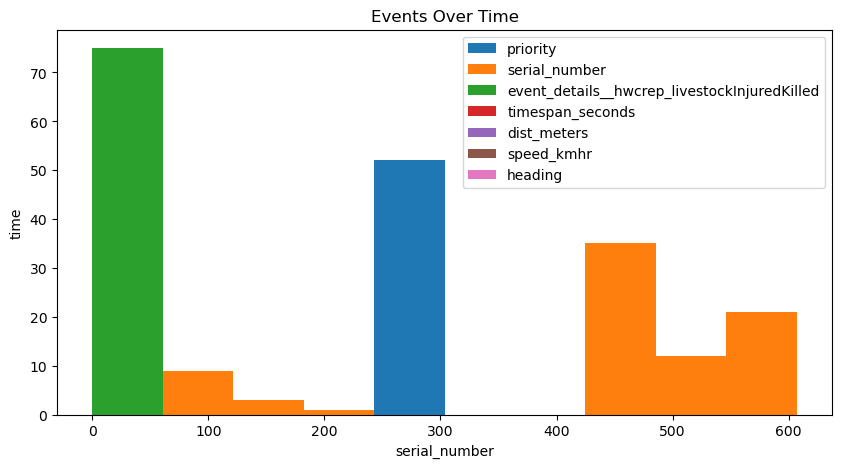

In [78]:
# Plotting events over time
kwt_df.plot(kind='hist', figsize=(10, 5))
plt.title('Events Over Time')
plt.xlabel('serial_number')
plt.ylabel('time')
plt.show()

In [86]:
# plotting distance covered by each lion
kwt_df.plot(kind='hist', 'serial_number','dist_meters', figsize=(10, 5))
plt.title('distance covered over time')
plt.xlabel('serial_number')
plt.ylabel('dist_meters')
plt.show()

SyntaxError: positional argument follows keyword argument (1596668257.py, line 2)

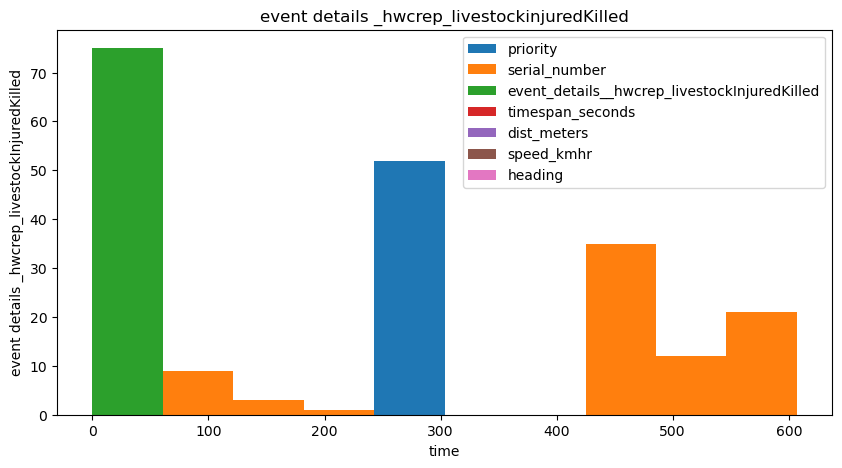

In [80]:
# plotting event details _hwcrep_livestockinjuredKilled
kwt_df.plot(kind='hist', figsize=(10, 5))
plt.title('event details _hwcrep_livestockinjuredKilled')
plt.xlabel('time')
plt.ylabel('event details _hwcrep_livestockInjuredKilled')
plt.show()

In [ ]:
#ploting location of each lion against time

* anlyzing the datasets